<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/sbi_eda_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

# New Section

In [14]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

In [15]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-27"

In [138]:
# Download data from Yahoo Finance
symbol<-getSymbols("SBIN.NS",from=start_date,auto.assign=FALSE)



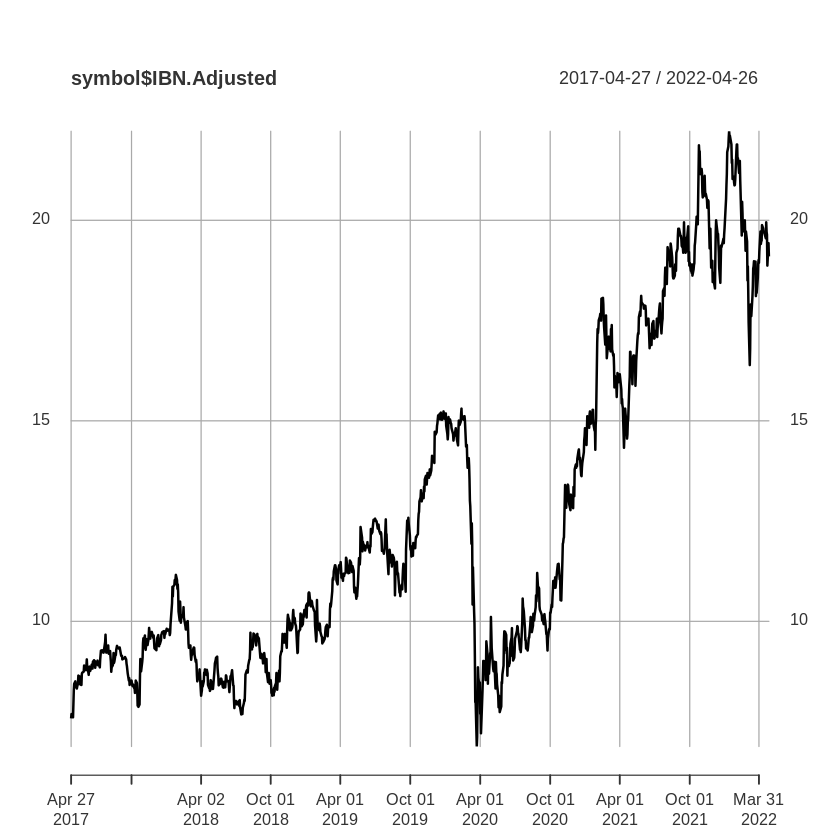

In [92]:
plot(symbol$SBIN.NS.Adjusted)

In [139]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$SBIN.NS.Volume>0,]

     Index             SBIN.NS.Open    SBIN.NS.High    SBIN.NS.Low   
 Min.   :2017-04-27   Min.   :151.9   Min.   :153.2   Min.   :149.4  
 1st Qu.:2018-07-21   1st Qu.:264.4   1st Qu.:268.4   1st Qu.:260.6  
 Median :2019-10-31   Median :296.5   Median :300.9   Median :292.6  
 Mean   :2019-10-26   Mean   :316.3   Mean   :320.6   Mean   :311.5  
 3rd Qu.:2021-01-23   3rd Qu.:354.4   3rd Qu.:359.2   3rd Qu.:349.5  
 Max.   :2022-04-26   Max.   :544.0   Max.   :549.0   Max.   :537.1  
 SBIN.NS.Close   SBIN.NS.Volume      SBIN.NS.Adjusted
 Min.   :150.8   Min.   :  2095795   Min.   :149.5   
 1st Qu.:263.5   1st Qu.: 16094513   1st Qu.:261.1   
 Median :296.4   Median : 24119619   Median :293.4   
 Mean   :315.9   Mean   : 33159632   Mean   :313.8   
 3rd Qu.:353.9   3rd Qu.: 42348418   3rd Qu.:350.6   
 Max.   :540.5   Max.   :262677081   Max.   :540.5   

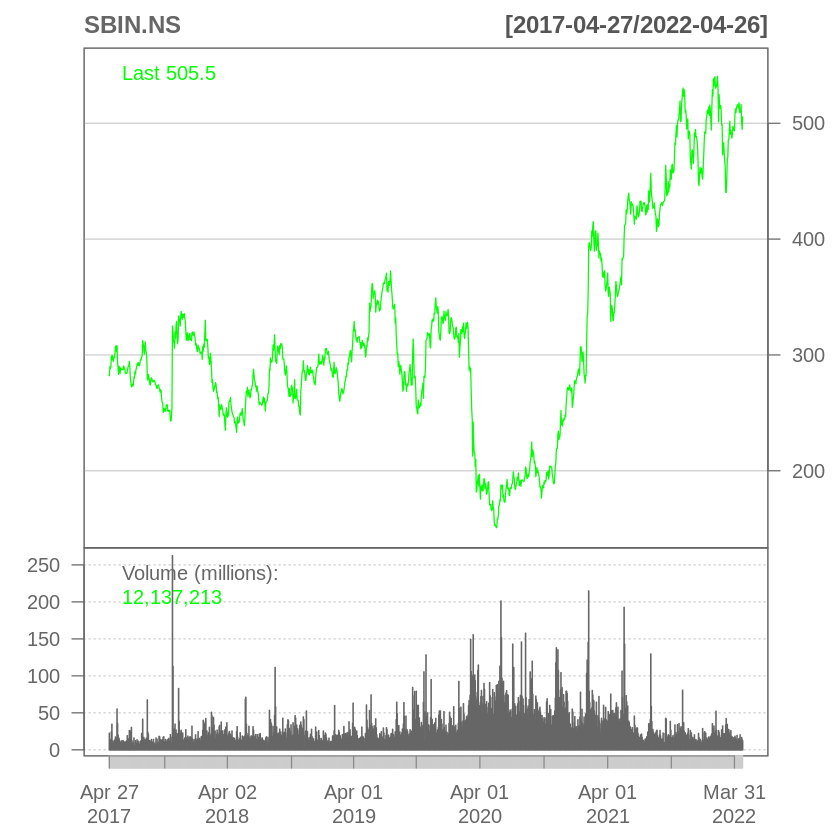

In [140]:
chartSeries(symbol,theme="white.mono",name="SBIN.NS",type = 'line', up.col = "green",dn.col="red")

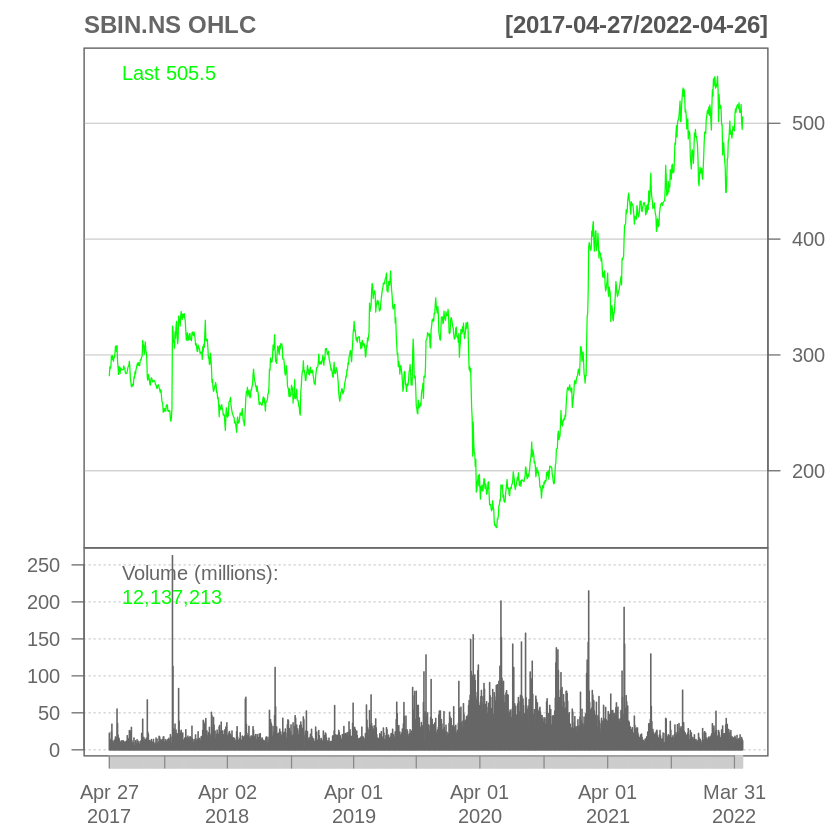

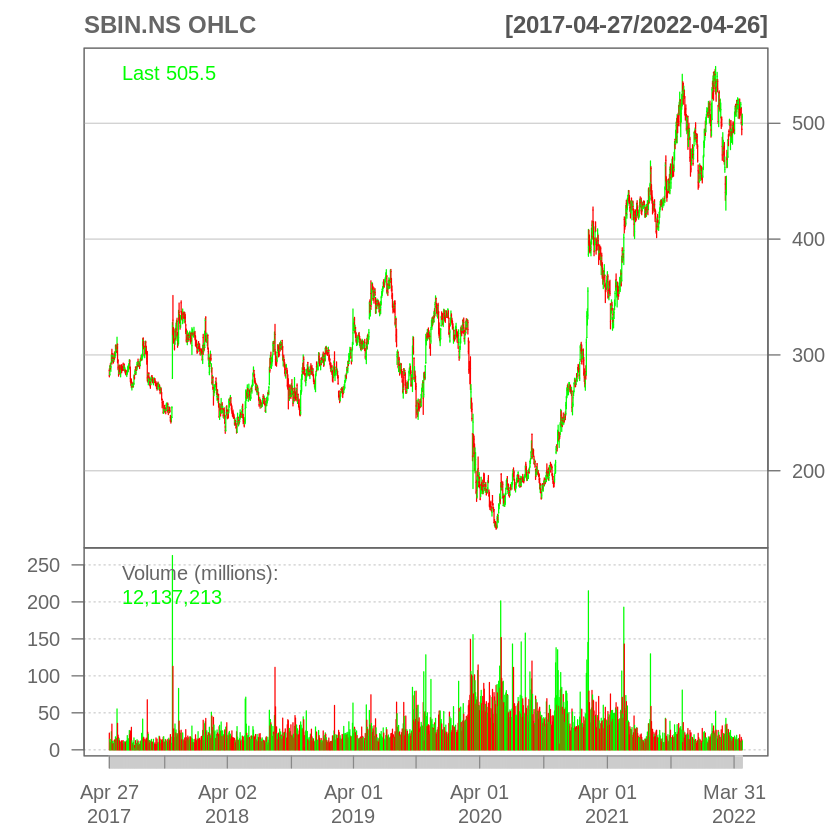

In [141]:
# Convert the Yahoo data into an OHLC Chart
symbol_ohlc<-as.quantmod.OHLC(symbol[,-6],col.names=c("Open","High","Low","Close","Volume"))
# Plotting the Open High Low Close charts along with volume
chartSeries(symbol_ohlc, theme="white.mono", type ='line', name="SBIN.NS OHLC", up.col = "green",dn.col="red")
chartSeries(symbol_ohlc, theme="white.mono", type ='bar',  name="SBIN.NS OHLC", up.col = "green",dn.col="red")
# chartSeries(symbol_ohlc, theme="white.mono", type ='hlc',  name="SBIN.NS OHLC", up.col = "green",dn.col="red")

In [143]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$SBIN.NS.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"sbi_returns.csv",row.names=FALSE)

           SBIN.NS.Adjusted
2017-04-28      0.026934257
2017-05-02     -0.005016879
2017-05-03      0.005189333
2017-05-04      0.031419809
2017-05-05     -0.010251370
2017-05-08      0.011421056

In [144]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)
jarqueberaTest(prices$SBIN.NS.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 106.2514
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 04:13:47 2022 by user: 


In [145]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for SBIN.NS
jarqueberaTest(returns$SBIN.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 8279.5759
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 04:13:51 2022 by user: 


In [146]:
# Now we do other tests for same data for cross check
shapiroTest(prices$SBIN.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9312
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 04:13:57 2022 by user: 


In [147]:
shapiroTest(returns$SBIN.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9153
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 04:14:02 2022 by user: 


In [148]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$SBIN.NS.Adjusted) #  p-value = 0.41, not stationary




	Augmented Dickey-Fuller Test

data:  prices$SBIN.NS.Adjusted
Dickey-Fuller = -1.6997, Lag order = 10, p-value = 0.7054
alternative hypothesis: stationary


In [149]:
adf.test(returns$SBIN.NS.Adjusted) 

Warning message in adf.test(returns$SBIN.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$SBIN.NS.Adjusted
Dickey-Fuller = -9.707, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [150]:
# altrenative to adf.test, as adf is not giving required results
summary(ur.df(prices$SBIN.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.272  -3.463  -0.040   3.564  69.663 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1    0.0004277  0.0006172   0.693    0.488
z.diff.lag 0.0041272  0.0285327   0.145    0.885

Residual standard error: 7.063 on 1231 degrees of freedom
Multiple R-squared:  0.0004141,	Adjusted R-squared:  -0.00121 
F-statistic: 0.255 on 2 and 1231 DF,  p-value: 0.775


Value of test-statistic is: 0.6929 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [151]:
summary(ur.df(returns$SBIN.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.142774 -0.011260  0.000347  0.012346  0.244433 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.98405    0.04054 -24.276   <2e-16 ***
z.diff.lag -0.02690    0.02850  -0.944    0.345    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02363 on 1230 degrees of freedom
Multiple R-squared:  0.5058,	Adjusted R-squared:  0.505 
F-statistic: 629.5 on 2 and 1230 DF,  p-value: < 2.2e-16


Value of test-statistic is: -24.276 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [152]:
summary(ur.kpss(prices$SBIN.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 5.4742 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [153]:
summary(ur.kpss(returns$SBIN.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.1516 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


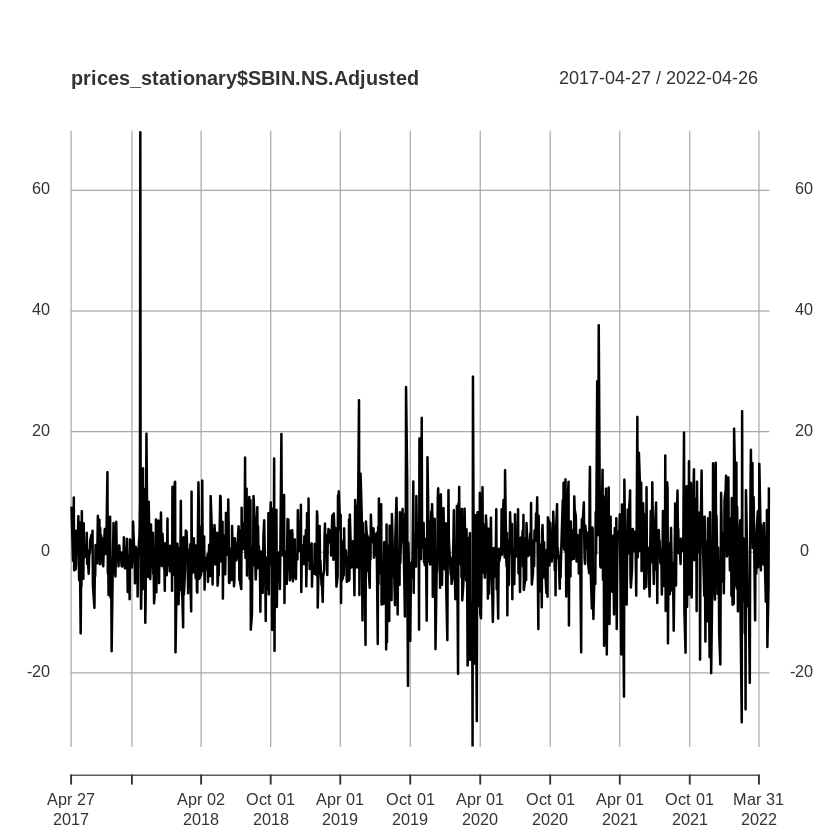

In [154]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices_stationary <- diff(prices)
plot (prices_stationary$SBIN.NS.Adjusted)

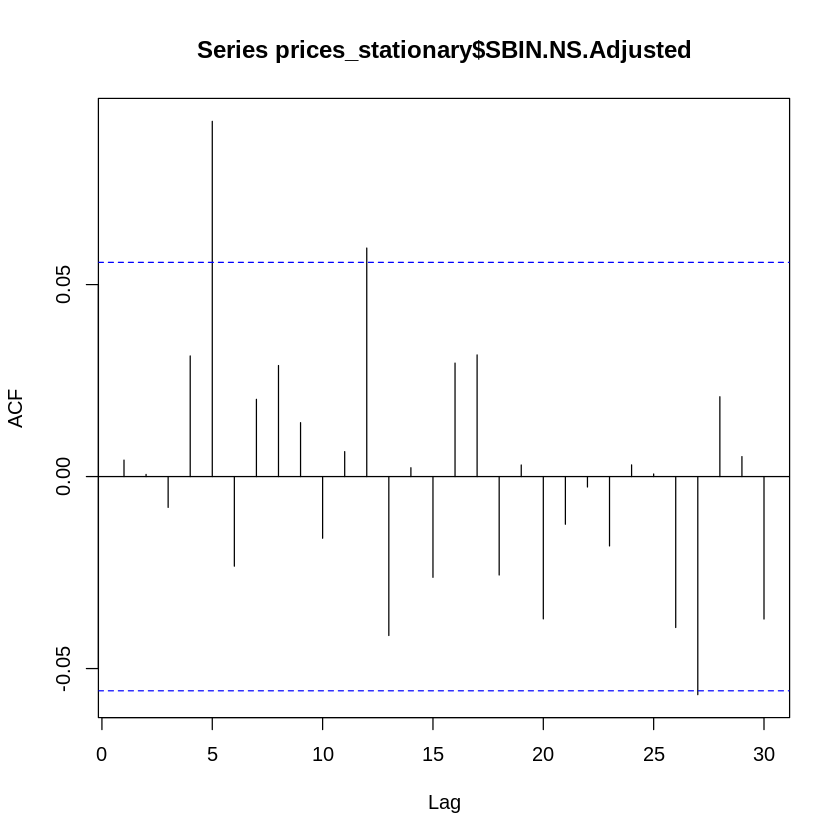

In [155]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices_stationary<-na.omit(prices_stationary)
acf(prices_stationary$SBIN.NS.Adjusted)

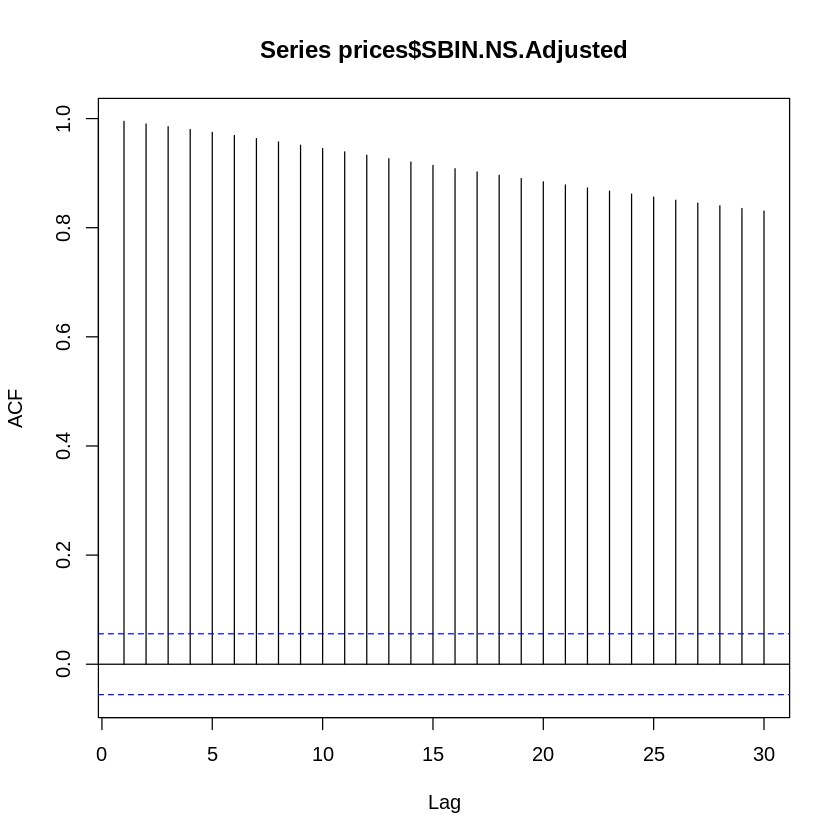

In [156]:
# on the otherhand if we compute ACF on data with trend
prices<-na.omit(prices)
acf(prices$SBIN.NS.Adjusted)

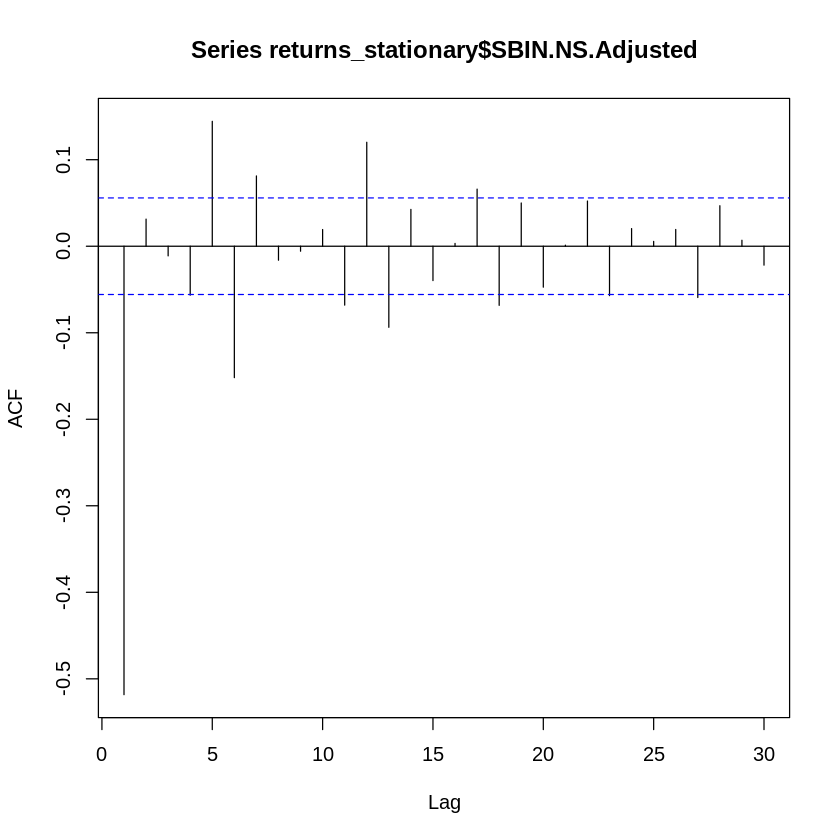

In [157]:
# similarly, finding acf for returns.
returns_stationary <- diff(returns)
returns_stationary<-na.omit(returns_stationary)
acf(returns_stationary$SBIN.NS.Adjusted)

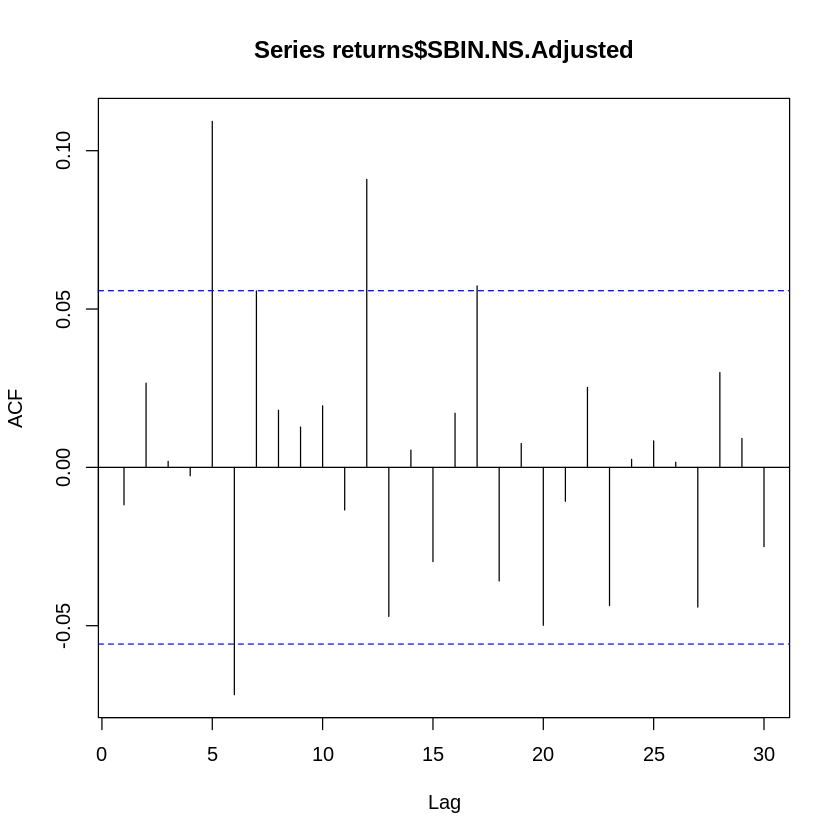

In [158]:
# on the otherhand if we compute ACF on data with trend
returns<-na.omit(returns)
acf(returns$SBIN.NS.Adjusted)

In [159]:
# tests for auto-corelation
Box.test(prices_stationary$SBIN.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices_stationary$SBIN.NS.Adjusted
X-squared = 11.95, df = 5, p-value = 0.03548


In [160]:
# for returns
Box.test(returns_stationary$SBIN.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns_stationary$SBIN.NS.Adjusted
X-squared = 363.2, df = 5, p-value < 2.2e-16


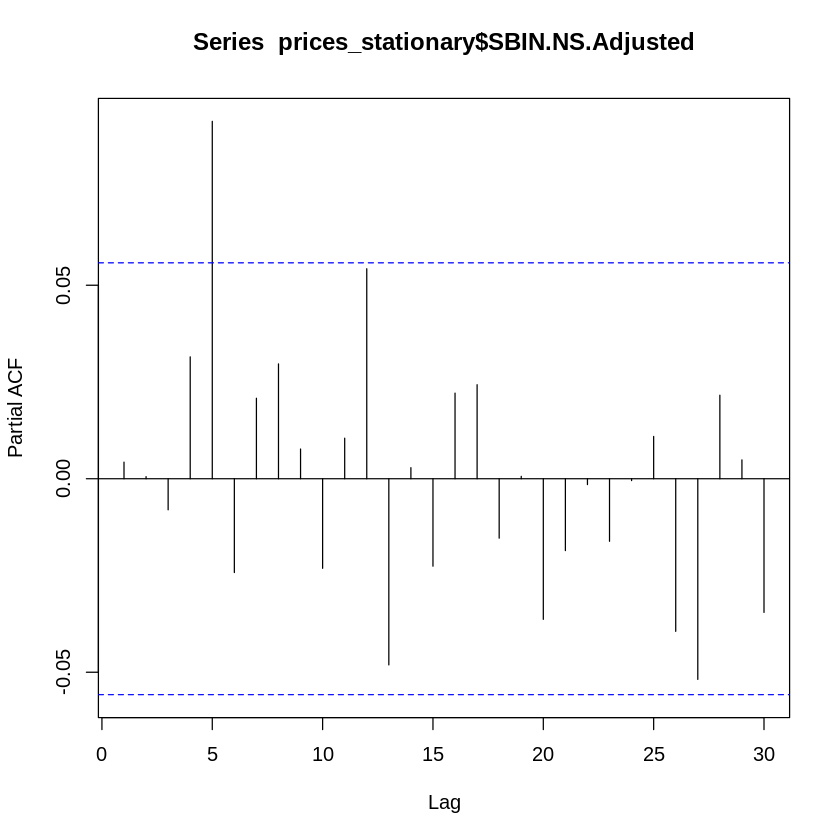

In [161]:
#PACF
pacf(prices_stationary$SBIN.NS.Adjusted)

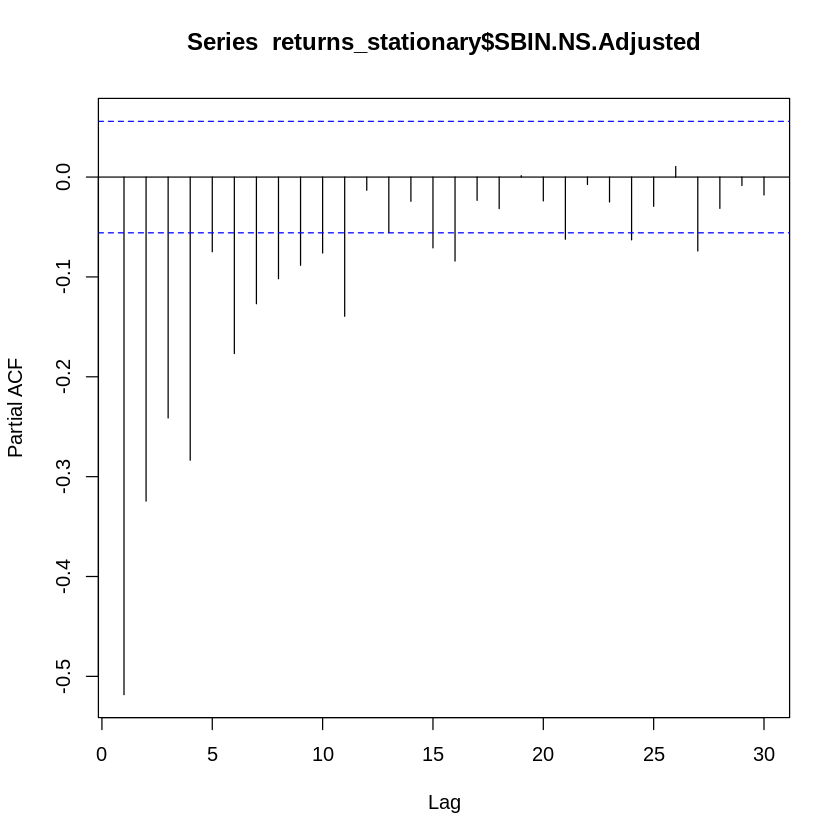

In [162]:
pacf(returns_stationary$SBIN.NS.Adjusted)

In [163]:
basicStats(prices)

,SBIN.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,149.470016
Maximum,540.549988
1. Quartile,261.114243
3. Quartile,350.637741
Mean,313.767532
Median,293.391266
Sum,387502.901606


In [164]:
BoxCox.lambda(prices$SBIN.NS.Adjusted)

[1] 0.5406988

In [165]:
# To make our data appear normal
prices_normal<-prices
prices_normal$SBIN.NS.Adjusted<-forecast::BoxCox(prices$SBIN.NS.Adjusted, lambda = 0.540698838107367)
basicStats(prices_normal)

,SBIN.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,25.872469
Maximum,53.700756
1. Quartile,35.632480
3. Quartile,42.109424
Mean,39.143260
Median,38.070528
Sum,48341.926247


In [166]:
returns_normal<-returns
# to handle negative values in the returns
returns_normal<-exp(returns_normal)
returns_normal<-na.omit(returns_normal)
BoxCox.lambda(returns_normal$SBIN.NS.Adjusted)


[1] -0.9999242

In [167]:
returns_normal$SBIN.NS.Adjusted<-forecast::BoxCox(returns$SBIN.NS.Adjusted, lambda = -0.99992424816297)
# need to take log, basically to undo the exp above
# returns_normal<-log(returns_normal) 
basicStats(returns_normal)

,SBIN.NS.Adjusted
,<dbl>
nobs,1.234000e+03
NAs,6.080000e+02
Minimum,-8.766974e+03
Maximum,-3.091231e+00
1. Quartile,-2.048552e+02
3. Quartile,-4.243314e+01
Mean,-2.958519e+02
Median,-8.048646e+01
Sum,-1.852033e+05


In [168]:
model<-auto.arima(prices$SBIN.NS.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(0,1,0)  


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : Inf
 ARIMA(0,1,0) with drift         : 8324.435
 ARIMA(1,1,0) with drift         : 8326.328
 ARIMA(0,1,1) with drift         : 8326.422
 ARIMA(0,1,0)                    : 8323.278
 ARIMA(1,1,1) with drift         : 8328.339

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,0)                    : 8327.186

 Best model: ARIMA(0,1,0)                    



     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1236          505.5 496.4534 514.5466 491.6645 519.3355
1237          505.5 492.7062 518.2938 485.9336 525.0664
1238          505.5 489.8309 521.1691 481.5362 529.4638
1239          505.5 487.4069 523.5931 477.8290 533.1710
1240          505.5 485.2713 525.7287 474.5628 536.4372
1241          505.5 483.3405 527.6595 471.6100 539.3900
1242          505.5 481.5651 529.4349 468.8947 542.1053
1243          505.5 479.9125 531.0875 466.3672 544.6328
1244          505.5 478.3603 532.6397 463.9934 547.0066
1245          505.5 476.8923 534.1077 461.7483 549.2517

In [169]:
cor(prices)

,SBIN.NS.Adjusted
SBIN.NS.Adjusted,1


In [170]:
cor(returns)

,SBIN.NS.Adjusted
SBIN.NS.Adjusted,1



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 14.748, df = 10, p-value = 0.1415

Model df: 0.   Total lags used: 10



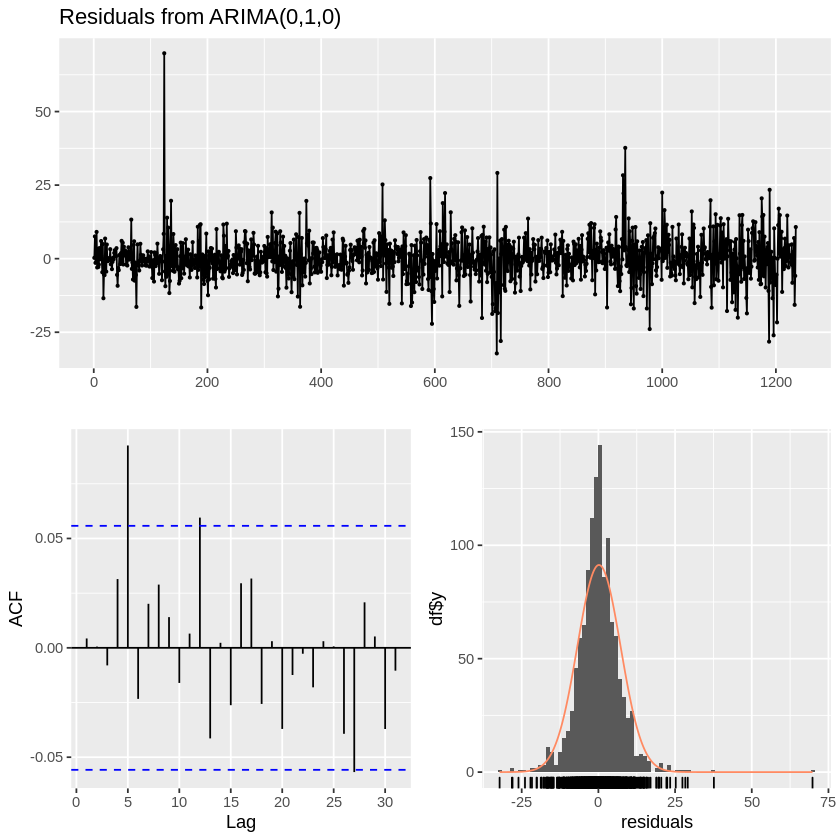

In [171]:
# Model analysis - The residuals will tell us if the model was able to capture 
# all of the information provided by the data.
checkresiduals(model)

In [172]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.1852728,7.056209,4.933962,0.02109529,1.628662,0.9992357,0.004297639


In [173]:
# Forecast for next day
fcast <- forecast(model, 30)
print(summary(fcast))
tail(prices)


Forecast method: ARIMA(0,1,0)

Model Information:
Series: prices$SBIN.NS.Adjusted 
ARIMA(0,1,0) 

sigma^2 = 49.83:  log likelihood = -4162.59
AIC=8327.18   AICc=8327.19   BIC=8332.3

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.1852728 7.056209 4.933962 0.02109529 1.628662 0.9992357
                    ACF1
Training set 0.004297639

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1236          505.5 496.4534 514.5466 491.6645 519.3355
1237          505.5 492.7062 518.2938 485.9336 525.0664
1238          505.5 489.8309 521.1691 481.5362 529.4638
1239          505.5 487.4069 523.5931 477.8290 533.1710
1240          505.5 485.2713 525.7287 474.5628 536.4372
1241          505.5 483.3405 527.6595 471.6100 539.3900
1242          505.5 481.5651 529.4349 468.8947 542.1053
1243          505.5 479.9125 531.0875 466.3672 544.6328
1244          505.5 478.3603 532.6397 463.9934 547.0066
1245          505.5 476.8923 534.107

           SBIN.NS.Adjusted
2022-04-19           511.80
2022-04-20           509.30
2022-04-21           516.30
2022-04-22           500.60
2022-04-25           494.75
2022-04-26           505.50

[1] 1235

[1] 8.21044

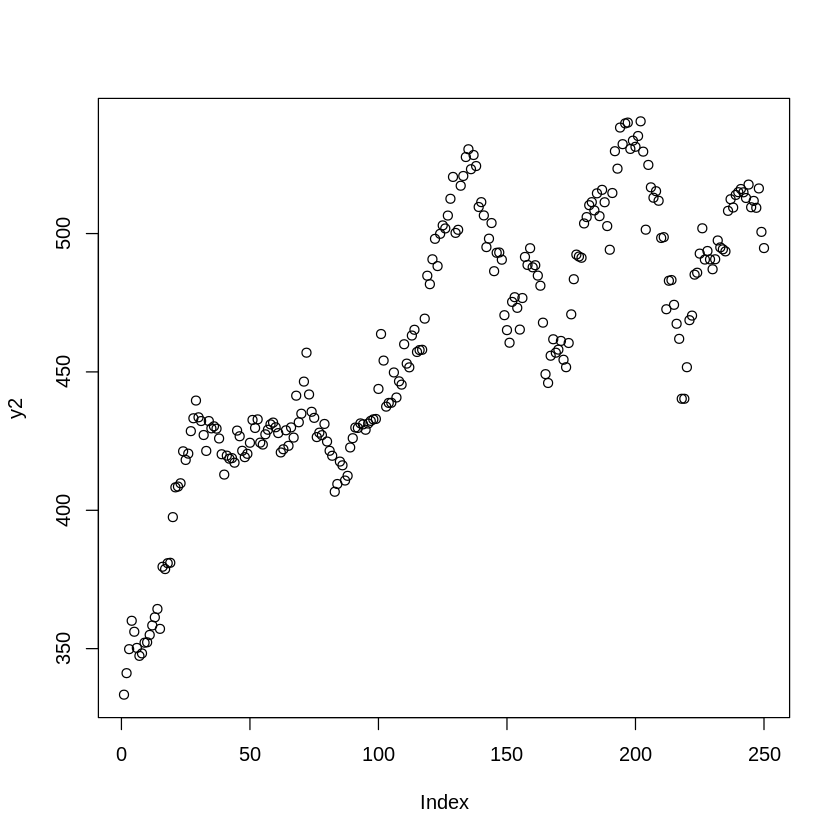

In [174]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 1235 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$SBIN.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$SBIN.NS.Adjusted,250)) 


[1] 1234

[1] 0.01770961

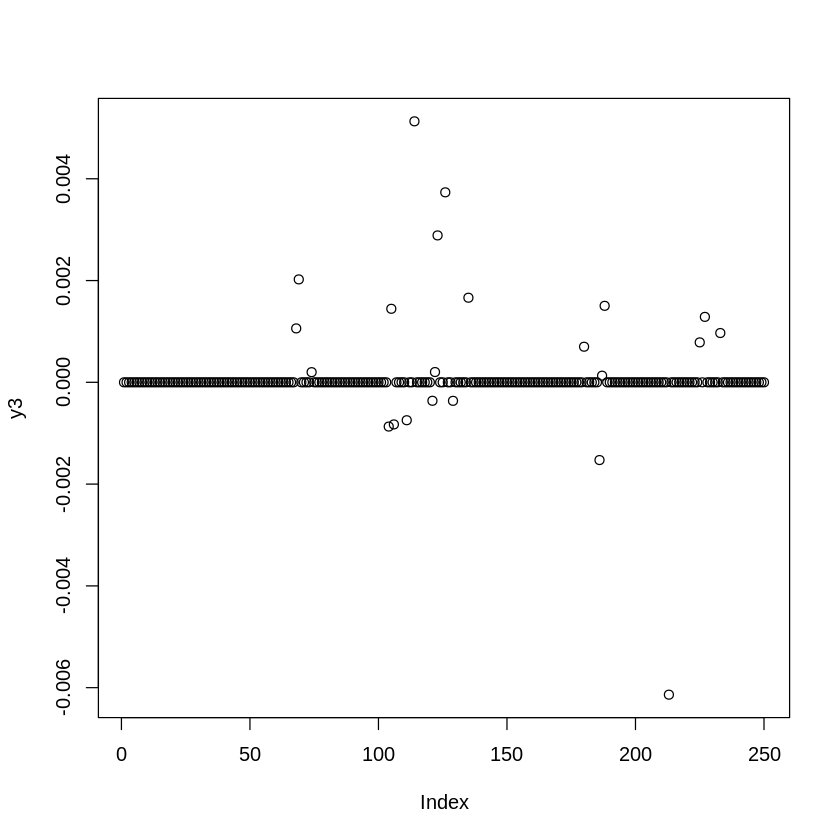

In [175]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$SBIN.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$SBIN.NS.Adjusted,250)) 